# Amazon Sales Analysis

### Table of Contents:
- [Asking Questions](#quastions_id)
- [Data Issues List](#issue_id)
- [Data Inspection](#inspect_id)
- [Data Wrangling](#wrangle_id)
- [Exploratory Data Analysis (EDA)](#eda_id)

<a id="quastions_id"></a> 
## Asking Questions :

1. Is there a difference in the sales trends between B2B and B2C customers over time?
2. Which day of week has the highest total sales?
3. When the drop of sales happened?
4. What is the best seller product and category?
5. Which state has the most total sales?
6. What is the ranking of the cities in purchasing products?

<a id="issue_id"></a> 
## Data Issues List :
- Column Names (Spaces before & after & between cloumn names' words)
- ['Order_id'] : duplicated columns
- ['Date'] : Datetype is object
- ['Status'], ['Fulfilment'], ['Sales_channel'], [Ship_service'], ['Style'], ['SKU']: have NaNs in same 2 rows
- ['Courier_status'] : NaN values
- ['Qty'] : have values with 0 
- ['Currency'] : NaN values
- ['Amount'] : NaN values & values with 0 & Outliers
- ['Ship_City'] : have 2 wrong values (wrong in data entry and we should handle it for data quality) & NaN values
- ['Ship_State'] , ['Ship_postal_code'] , ['Ship_country'] : same NaN values in 3 columns
- ['B2B'] : Datatype (to boolean instead of object)
- ['Fulfiled_by'] : have only one value "Easy Ship" so cast to boolean
- ['Unnamed_22'] : Empty column

<a id="inspect_id"></a> 
## Data Inspection :

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and inspect the first few rows
df = pd.read_csv('Amazon Sale Report.csv', encoding='latin1', index_col=0)
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
# Check the number of columns and rows
df.shape

(128977, 23)

In [4]:
# Inspecct the columns
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
# Check nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128977 entries, 0.0 to 128974.0
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128977 non-null  object 
 1   Date                128977 non-null  object 
 2   Status              128977 non-null  object 
 3   Fulfilment          128977 non-null  object 
 4   Sales Channel       128977 non-null  object 
 5   ship-service-level  128977 non-null  object 
 6   Style               128977 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  float64
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null

<a id="wrangle_id"></a> 
## Data Wrangling :

- Generate summary statistics for numerical and categorical variables.
- Visualize the distribution of key features to identify trends and patterns.

##### Handle column names:
`Handling spaces before & after & between column names' words`

In [6]:
# Remove right and left spaces
df.columns = df.columns.str.strip()
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
# Replace spaces and dashes with under scores
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'ship_service_level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'currency', 'Amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'B2B', 'fulfilled_by', 'Unnamed:_22'],
      dtype='object')

In [8]:
# Capitalize first letter
df.columns = df.columns.str.capitalize()
df.columns

Index(['Order_id', 'Date', 'Status', 'Fulfilment', 'Sales_channel',
       'Ship_service_level', 'Style', 'Sku', 'Category', 'Size', 'Asin',
       'Courier_status', 'Qty', 'Currency', 'Amount', 'Ship_city',
       'Ship_state', 'Ship_postal_code', 'Ship_country', 'Promotion_ids',
       'B2b', 'Fulfilled_by', 'Unnamed:_22'],
      dtype='object')

In [9]:
# Rename column B2b
df.rename(columns = {'B2b' : 'B2B' , 'Sku' : 'SKU', 'Asin' : 'ASIN', 'Fulfilled_by' : 'Fulfilled_by_easy_ship'}, inplace=True)
df.columns

Index(['Order_id', 'Date', 'Status', 'Fulfilment', 'Sales_channel',
       'Ship_service_level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_status', 'Qty', 'Currency', 'Amount', 'Ship_city',
       'Ship_state', 'Ship_postal_code', 'Ship_country', 'Promotion_ids',
       'B2B', 'Fulfilled_by_easy_ship', 'Unnamed:_22'],
      dtype='object')

##### Handle Order ID column:

In [10]:
df['Order_id'].value_counts()

Order_id
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
407-8086623-5674716     1
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
408-7436540-8728312     1
Name: count, Length: 120379, dtype: int64

`It's normal to have duplicates because order could have several products!!` \
`SO I WOULD NOT DROP THEM !!!`

##### Handle date column: 

`Cast date column to datetime & handle NaNs`

In [11]:
# Check date column 
print(f"Data Type before casting: {df['Date'].dtype}")

# Cast date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(f"Data Type after casting : {df['Date'].dtype}")
print(f"Number of NaN after casting : {df['Date'].isna().sum()}")

Data Type before casting: object
Data Type after casting : datetime64[ns]
Number of NaN after casting : 2


In [12]:
# Drop NaN Values
df.dropna(subset=['Date'], inplace=True)

# Verify dropping NaN 
print(f"Number of NaN after dropping: {df['Date'].isna().sum()}")

Number of NaN after dropping: 0


##### Handle Courier_status column:

`Drop rows with NaN`

In [13]:
print(f"Number of NaN before dropping: {df['Courier_status'].isna().sum()}")
# Drop NaN Values
df.dropna(subset=['Courier_status'], inplace=True)

# Verify dropping NaN 
print(f"Number of NaN after dropping: {df['Courier_status'].isna().sum()}")

Number of NaN before dropping: 6872
Number of NaN after dropping: 0


##### Handle Currency column:

`Replace NaN with the only currency in data "INR"`

In [14]:
print(f"Number of NaN before dropping: {df['Currency'].isna().sum()}")
# Replace NaN values with INR
df.Currency.fillna("INR", inplace=True)

# Verify dropping NaN 
print(f"Number of NaN after dropping: {df['Currency'].isna().sum()}")

Number of NaN before dropping: 6059
Number of NaN after dropping: 0


##### Handle Amount column:

`Replace NaN & 0 with mean of each SKU, where SKU identify product`

In [15]:
""" Handling NaN & 0 """
# Group data by SKU and calculate average amount
average_amount_per_sku = df.groupby('SKU')['Amount'].mean()

# Define a function to replace NaN values or zeros with SKU average amount
def replace_nan_with_average(row):
    sku = row['SKU']
    amount = row['Amount']
    if pd.isna(amount) | (amount == 0):  # Check if amount is NaN or equal to zero
        return average_amount_per_sku.loc[sku]  # Replace with average for that SKU
    else:
        return amount

# Apply the function to each row
df['Amount'] = df.apply(replace_nan_with_average, axis=1)

In [16]:
# Check about NaN values
df['Amount'].isnull().sum()

# Drop NaN Values
df.dropna(subset=['Amount'], inplace=True)
df = df[df['Amount'] != 0]

# Verify dropping NaN 
print(f"Number of NaN after dropping: {df['Courier_status'].isna().sum()}")

Number of NaN after dropping: 0


In [17]:
df[df.Amount == 0]

,Order_id,Date,Status,Fulfilment,Sales_channel,Ship_service_level,Style,SKU,Category,Size,...,Currency,Amount,Ship_city,Ship_state,Ship_postal_code,Ship_country,Promotion_ids,B2B,Fulfilled_by_easy_ship,Unnamed:_22
index,,,,,,,,,,,,,,,,,,,,,


`Outliers Detection & Handling`

<Axes: xlabel='Amount'>

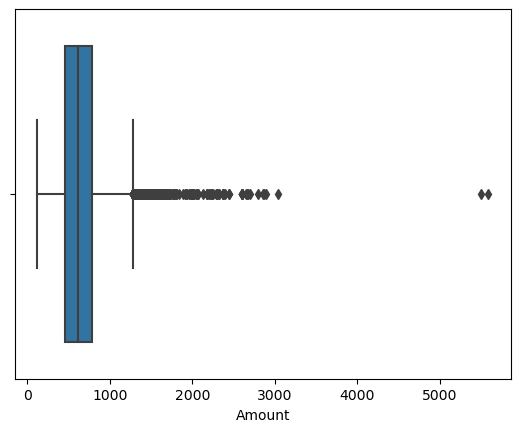

In [18]:
sns.boxplot(x=df.Amount)

In [19]:
# Outlier detection 
# IQR
# Calculate the upper and lower limits
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Check number of upper and lower outliers before removal
print(f"Upper Outliers before removal : {len(df.loc[(df.Amount >= upper)])}")
print(f"Lower Outliers before removal : {len(df.loc[(df.Amount <= lower)])}")

# Filter for non-outlier rows
df = df.loc[(df.Amount >= lower) & (df.Amount <= upper)]

# Check number of upper and lower outliers after removal
print(f"Upper Outliers after removal : {len(df.loc[(df.Amount >= upper)])}")
print(f"Lower Outliers after removal : {len(df.loc[(df.Amount <= lower)])}")

Upper Outliers before removal : 3882
Lower Outliers before removal : 0
Upper Outliers after removal : 0
Lower Outliers after removal : 0


<Axes: xlabel='Amount'>

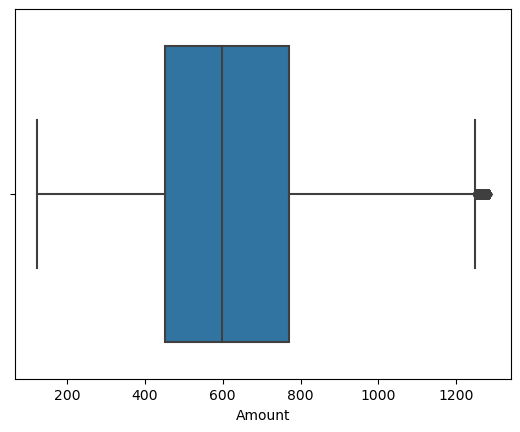

In [20]:
sns.boxplot(x=df.Amount)

##### Handle shipment destination columns:

`Drop rows with NaN` \
`BY DROPPING THOSE ROWS WE ALSO DROP (2 WRONG VALUES IN ['Ship_city'] & NaNs in [['Ship_city], ['Ship_postal_code'], ['Ship_country]]`


In [21]:
# Check about NaN values
len(pd.isnull(df['Ship_state']))

118164

In [22]:
# Remove NaN in shipment destination columns
df.dropna(subset=['Ship_state'], inplace=True)

# Verify dropping NaN 
print(f"Number of NaN after dropping: {df['Ship_state'].isna().sum()}")

Number of NaN after dropping: 0


##### Handle B2B column:

`Cast datatype to boolean`

In [23]:
# Cast B2B column to boolean data type
df.B2B.astype('bool')

index
1.0         False
2.0          True
4.0         False
5.0         False
6.0         False
            ...  
128970.0    False
128971.0    False
128972.0    False
128973.0    False
128974.0    False
Name: B2B, Length: 118133, dtype: bool

In [24]:
df.B2B.isnull().sum()

0

##### Handle fulfilled_by column

`This column just have 1 value "Easy Ship" or NaN` \ 
`Replace "Easy Ship" to True and Cast datatype to boolean` \ 
` Final Result: ["Fulfilled_by_easy_ship"] with (True or False)`

In [25]:
# make value of easy ship equal true and NaNs equal false
df.Fulfilled_by_easy_ship = df.Fulfilled_by_easy_ship.apply(lambda x: True if x == "Easy Ship" else False)

# Cast column to boolean data type
df.Fulfilled_by_easy_ship.astype('bool')

index
1.0          True
2.0         False
4.0         False
5.0         False
6.0         False
            ...  
128970.0    False
128971.0    False
128972.0    False
128973.0    False
128974.0    False
Name: Fulfilled_by_easy_ship, Length: 118133, dtype: bool

##### Remove Unnamed:_22 column:

`Drop unused column`

In [26]:
df.drop(columns =['Unnamed:_22'], inplace=True)
# check new columns
df.columns

Index(['Order_id', 'Date', 'Status', 'Fulfilment', 'Sales_channel',
       'Ship_service_level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_status', 'Qty', 'Currency', 'Amount', 'Ship_city',
       'Ship_state', 'Ship_postal_code', 'Ship_country', 'Promotion_ids',
       'B2B', 'Fulfilled_by_easy_ship'],
      dtype='object')

____

In [27]:
df.shape

(118133, 22)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118133 entries, 1.0 to 128974.0
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_id                118133 non-null  object        
 1   Date                    118133 non-null  datetime64[ns]
 2   Status                  118133 non-null  object        
 3   Fulfilment              118133 non-null  object        
 4   Sales_channel           118133 non-null  object        
 5   Ship_service_level      118133 non-null  object        
 6   Style                   118133 non-null  object        
 7   SKU                     118133 non-null  object        
 8   Category                118133 non-null  object        
 9   Size                    118133 non-null  object        
 10  ASIN                    118133 non-null  object        
 11  Courier_status          118133 non-null  object        
 12  Qty                     118133 

In [29]:
df.to_csv("cleaned_dataset.csv", index=False)

___________________

<a id="eda_id"></a>  
## Exploratory Data Analysis (EDA) :

### Time dimention:

In [30]:
df['Total_sales'] = df.Qty * df.Amount
df['Day_of_week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

df.sample(3)

,Order_id,Date,Status,Fulfilment,Sales_channel,Ship_service_level,Style,SKU,Category,Size,...,Ship_city,Ship_state,Ship_postal_code,Ship_country,Promotion_ids,B2B,Fulfilled_by_easy_ship,Total_sales,Day_of_week,Month
index,,,,,,,,,,,,,,,,,,,,,
23958.0,171-5349614-2731504,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,JNE3701,JNE3701-KR-XS,kurta,XS,...,KOZHIKODE,KERALA,673571.0,IN,NaN,False,False,399.0,Saturday,April
99659.0,403-4513524-9836312,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,JNE3766,JNE3766-KR-M,kurta,M,...,HYDERABAD,TELANGANA,500091.0,IN,NaN,False,False,517.0,Wednesday,June
7827.0,407-2739881-9645957,2022-04-25,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-XXXL,Set,3XL,...,VADAKARA,KERALA,673101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,True,999.0,Monday,April


Text(0.5, 1.0, 'Total sales of quatities over time')

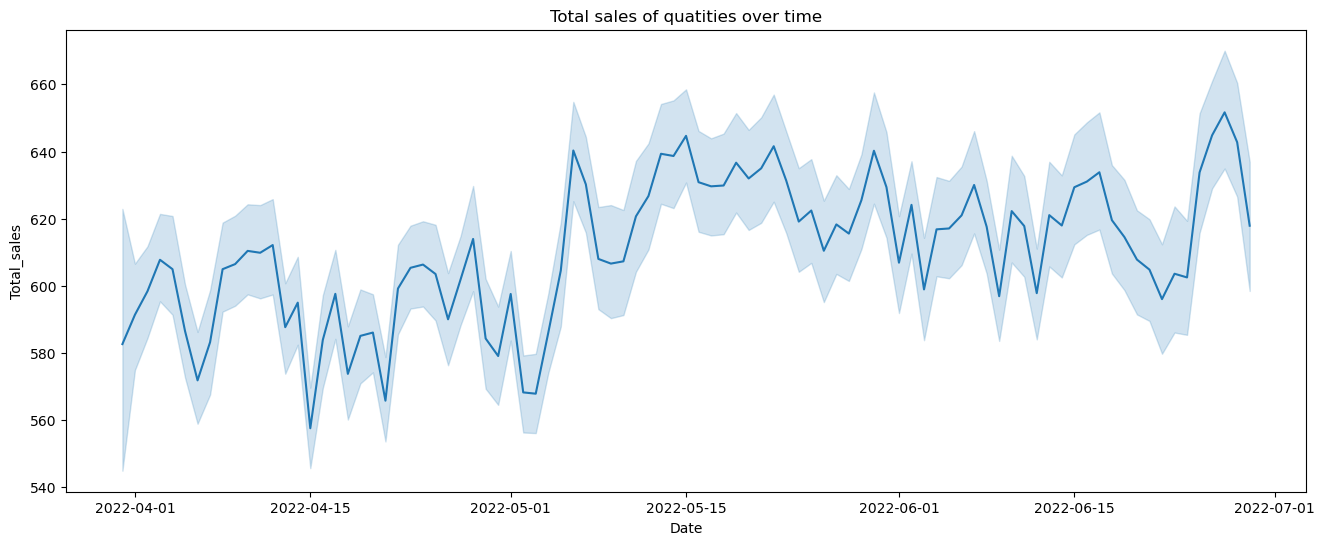

In [31]:
plt.figure(figsize = (16,6))
sns.lineplot(data = df, x = df.Date, y = df.Total_sales)
plt.title("Total sales of quatities over time")

`Upward trend in the total amount of sales over time.`

------------

Text(0.5, 1.0, 'Total sales of quatities over time (B2B or B2C)')

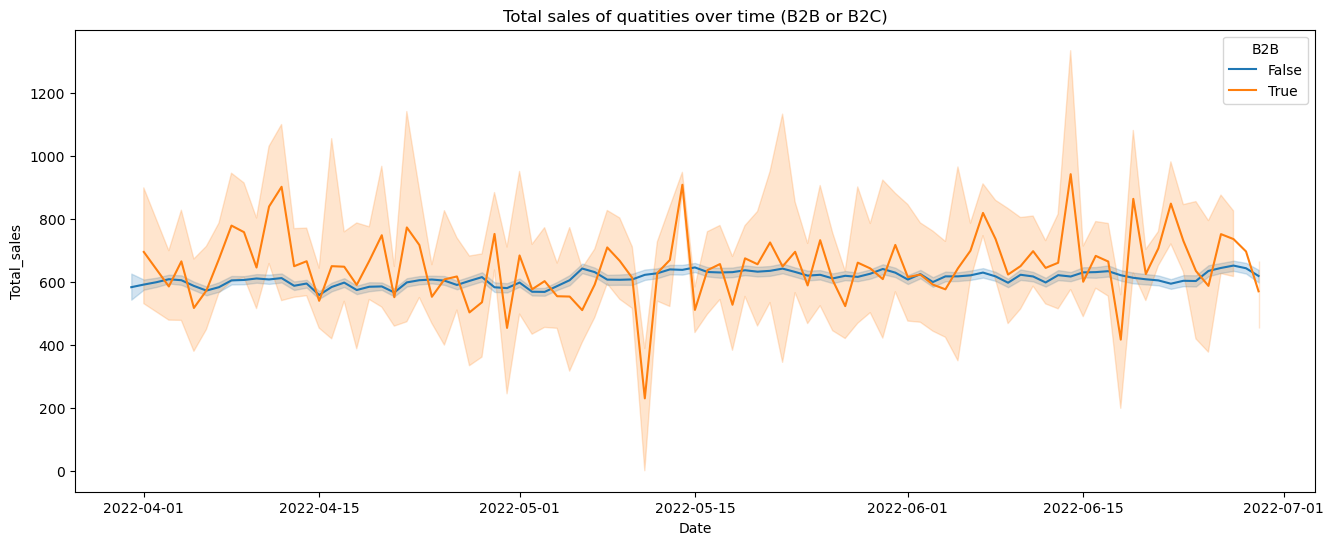

In [32]:
plt.figure(figsize = (16,6))
sns.lineplot(data = df, x = df.Date, y = df.Total_sales, hue = 'B2B')
plt.title("Total sales of quatities over time (B2B or B2C)")

`B2B : total amount of sales consistent over time`\
`B2C : total amount of sales changes over time with a drop in the first half of May.`

----------

In [33]:
total_days = df.groupby('Day_of_week').Total_sales.sum()

total_days

Day_of_week
Friday       9.843060e+06
Monday       1.036371e+07
Saturday     1.037918e+07
Sunday       1.107698e+07
Thursday     9.437406e+06
Tuesday      1.047593e+07
Wednesday    1.026409e+07
Name: Total_sales, dtype: float64

Text(0, 0.5, 'Total sales by million INR')

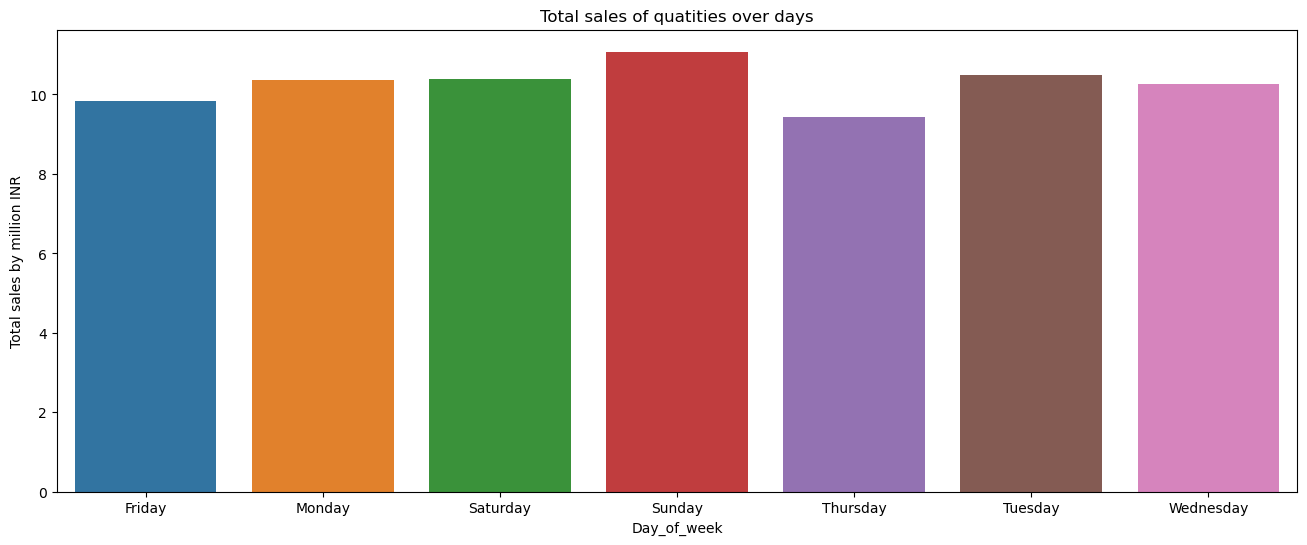

In [34]:
plt.figure(figsize = (16,6))
sns.barplot(x = total_days.index, y = total_days.values/1000000)
plt.title("Total sales of quatities over days")
plt.ylabel("Total sales by million INR")

`The total sales over the weekend higher than for weekdays.`

---------------------

In [35]:
total_months = df.groupby('Month').Total_sales.sum()

total_months

Month
April    2.680566e+07
June     2.137706e+07
March    9.496600e+04
May      2.356268e+07
Name: Total_sales, dtype: float64

Text(0, 0.5, 'Total sales by million INR')

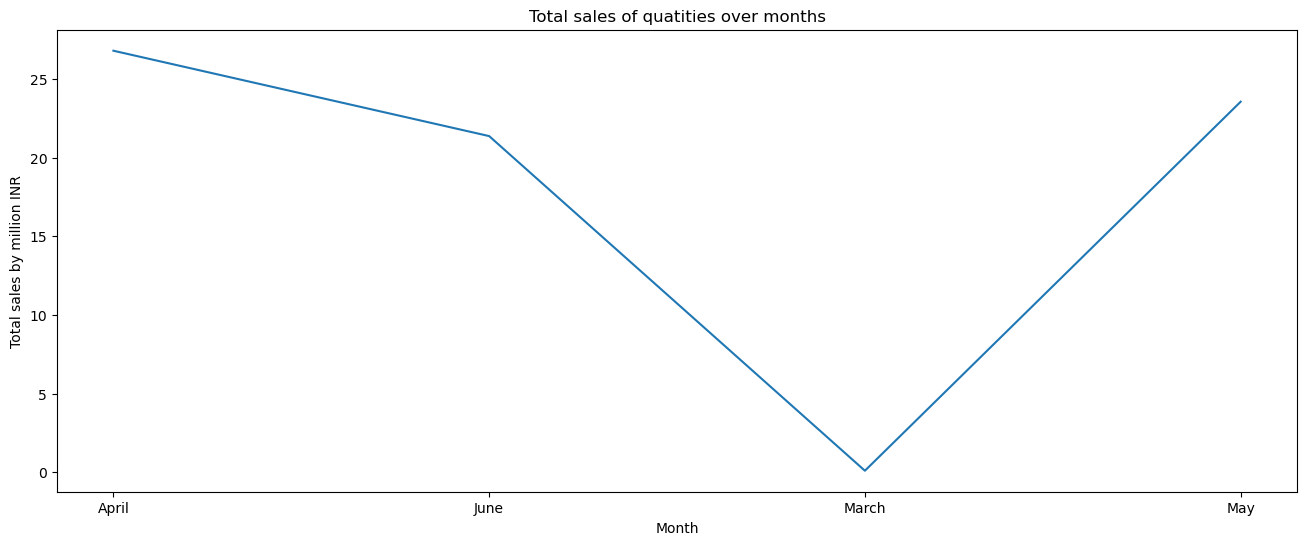

In [36]:
plt.figure(figsize = (16,6))
sns.lineplot(x = total_months.index, y = total_months.values/1000000)
plt.title("Total sales of quatities over months")
plt.ylabel("Total sales by million INR")

`From this chart we found that there is no enough data points in March.`

------------

### Top-selling products and categories:

In [37]:
# Top selling products by quantity
top_products_by_quantity = df.groupby('SKU').Qty.sum().nlargest(10)

top_products_by_quantity

SKU
JNE3797-KR-L       659.0
JNE3797-KR-M       551.0
JNE3797-KR-S       501.0
JNE3405-KR-L       481.0
JNE3797-KR-XL      411.0
JNE3405-KR-S       399.0
JNE3797-KR-XS      380.0
SET268-KR-NP-XL    371.0
J0230-SKD-M        362.0
J0230-SKD-S        361.0
Name: Qty, dtype: float64

Text(0.5, 1.0, 'Top selling products (Quantity)')

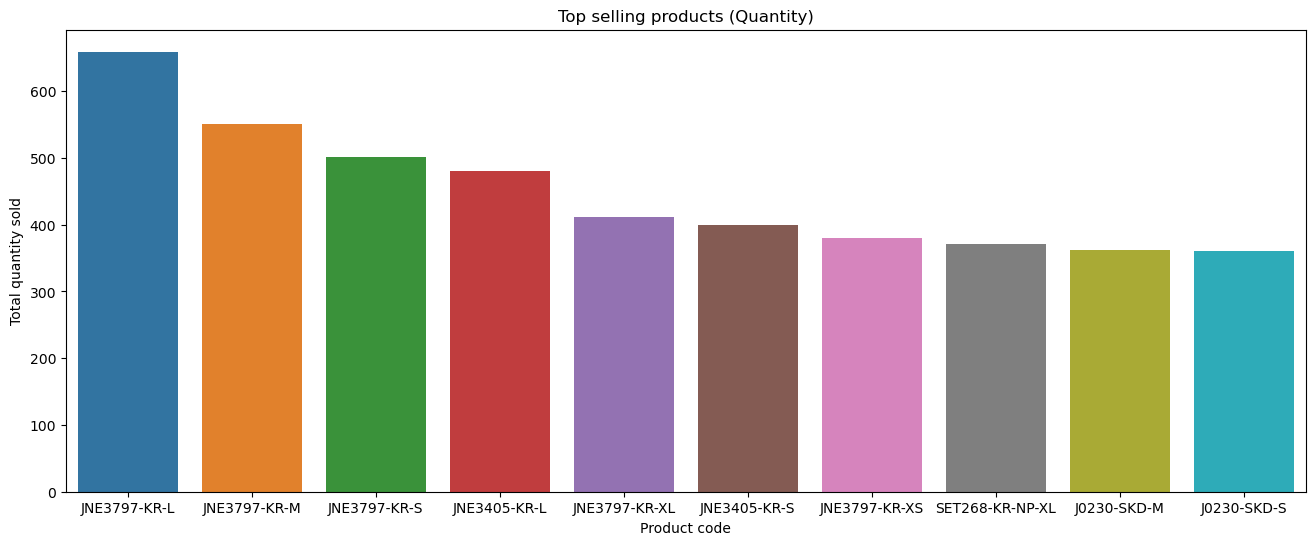

In [41]:
# Create a bar chart for top selling products
plt.figure(figsize = (16,6))
sns.barplot(x = top_products_by_quantity.index, y = top_products_by_quantity.values)
plt.xlabel('Product code')
plt.ylabel('Total quantity sold')
plt.title('Top selling products (Quantity)')

`The sellig of products is nearlly but the top one which have code "JNE3797-KR-L".`

-------------

In [42]:
# Top selling products by quantity
top_category_by_quantity = df.groupby('Category').Qty.sum().nlargest(10)

top_category_by_quantity

Category
kurta            44926.0
Set              41603.0
Western Dress    13799.0
Top               9881.0
Ethnic Dress      1033.0
Blouse             860.0
Bottom             393.0
Saree              145.0
Dupatta              3.0
Name: Qty, dtype: float64

Text(0.5, 1.0, 'Top selling categories (Quantity)')

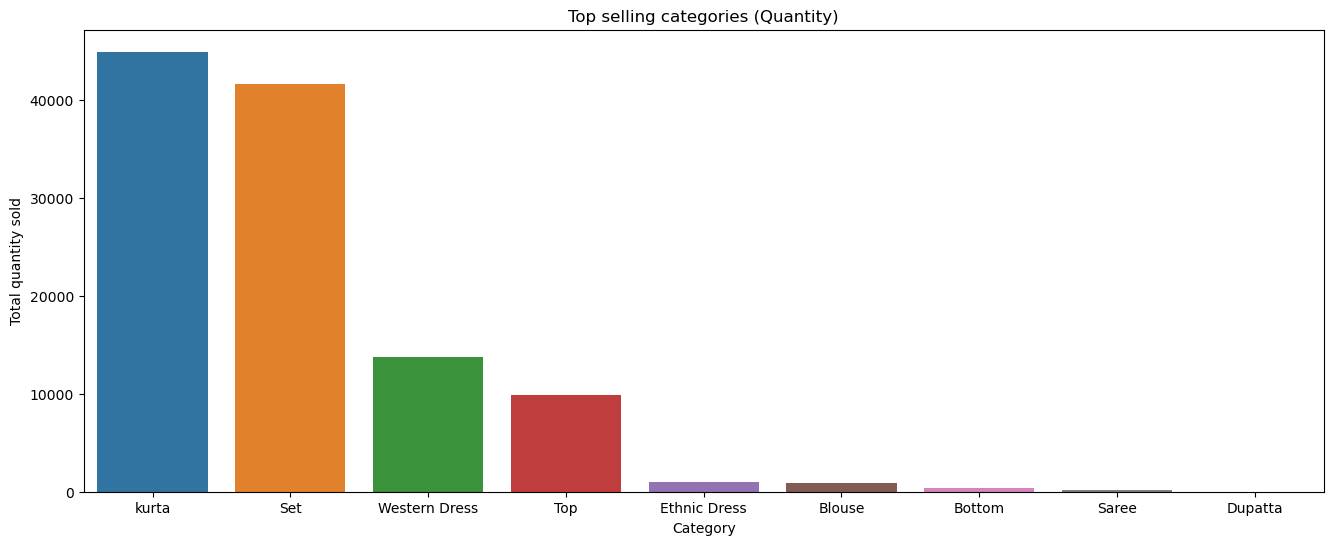

In [44]:
# Create a bar chart for top selling products
plt.figure(figsize = (16,6))
sns.barplot(x = top_category_by_quantity.index, y = top_category_by_quantity.values)
plt.xlabel('Category')
plt.ylabel('Total quantity sold')
plt.title('Top selling categories (Quantity)')

`Kurtas are the clear winner in terms of total quantity sold, followed by sets.`\
`Other products like dupattas, sarees and Shoes have lower overall sales quantity.`

------------------

### Sales distributions:

In [52]:
state_sales = df.groupby('Ship_state').Total_sales.sum().nlargest(10)



state_sales

Ship_state
MAHARASHTRA       1.235539e+07
KARNATAKA         9.735818e+06
TELANGANA         6.315843e+06
UTTAR PRADESH     6.133696e+06
TAMIL NADU        6.045311e+06
DELHI             3.898566e+06
KERALA            3.489143e+06
WEST BENGAL       3.226480e+06
ANDHRA PRADESH    2.884076e+06
HARYANA           2.608553e+06
Name: Total_sales, dtype: float64

Text(0.5, 1.0, 'Regional Sales by State (Heatmap)')

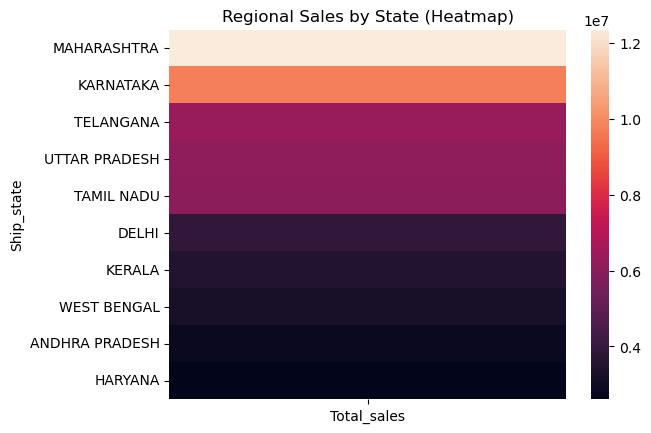

In [53]:
sns.heatmap(state_sales.to_frame())  # Convert Series to DataFrame for heatmap
plt.title('Regional Sales by State (Heatmap)')

`There are the top 10 with clear win to MAHARASHTRA.`

-----------

In [69]:
top_cities_by_quantity = df.groupby('Ship_city').Qty.sum().nlargest(10)

top_cities_by_quantity

Ship_city
BENGALURU    10111.0
HYDERABAD     7081.0
MUMBAI        5482.0
NEW DELHI     5064.0
CHENNAI       4829.0
PUNE          3429.0
KOLKATA       2101.0
GURUGRAM      1665.0
THANE         1491.0
NOIDA         1228.0
Name: Qty, dtype: float64

Text(0.5, 1.0, 'Regional Sales Distribution Across top 10 Indian Cities')

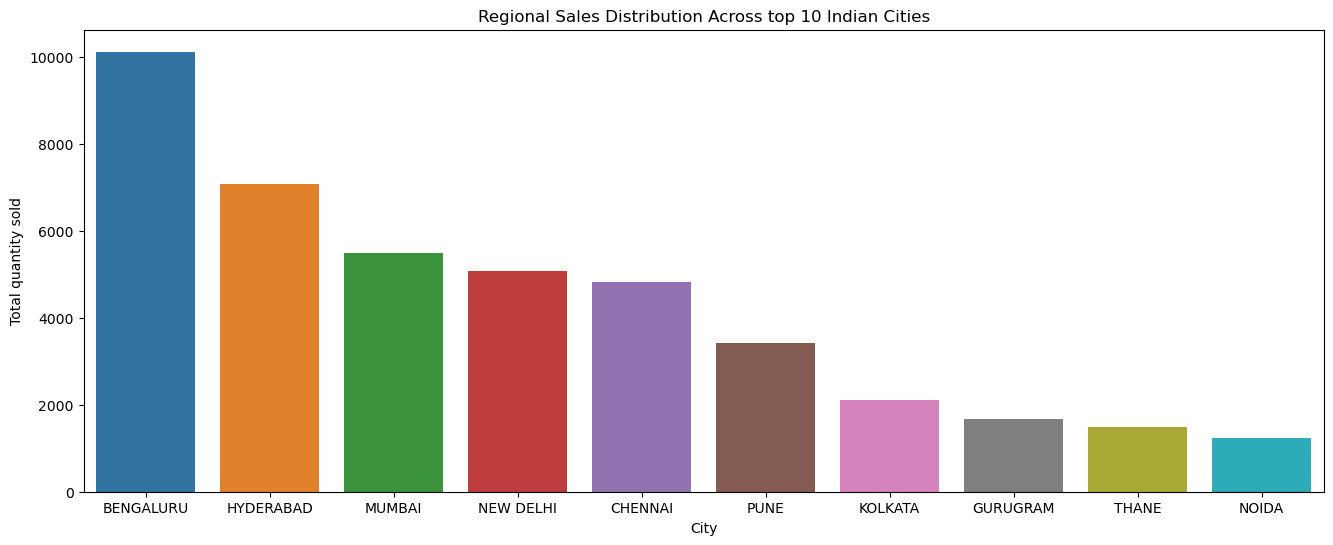

In [73]:
plt.figure(figsize = (16,6))
sns.barplot(x = top_cities_by_quantity.index, y = top_cities_by_quantity.values)
plt.xlabel('City')
plt.ylabel('Total quantity sold')
plt.title('Regional Sales Distribution Across top 10 Indian Cities')

`The top ranking of cities in purchasing products is BENGALURU.`

------------